<a href="https://colab.research.google.com/github/suyunon27/Lecture_2023_1_AI/blob/main/2023_1_AI_task_1_20222129.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

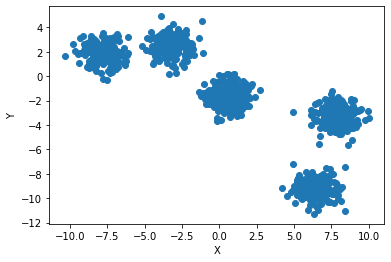

In [6]:
X,y = make_blobs(n_samples=1000, centers=5, cluster_std=0.80, random_state=6) # n_samples: 생성할 데이터 총 개수, centers: 생성할 군집의 수
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [27]:
def recalculate_clusters(X, centroids, k):
    clusters = {}
    for i in range(k):
        clusters[i] = []
    for data in X:
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j]))
        clusters[euc_dist.index(min(euc_dist))].append(data)
    return clusters    

def plot_clusters(centroids, clusters, k):
    colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple']
    plt.figure(figsize = (6, 4))  
    area = (20) ** 2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % k], alpha=0.6)          
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=200)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def cal_inertia(centroids, clusters, k, rep):
    WCSS = 0
    for i in range(k):
        for j in range(len(clusters[i])):
            WCSS = WCSS + np.linalg.norm(clusters[i][j] - centroids[i])
    print("Iteration {} --> Inertia: {:.2f}".format(rep, WCSS))

def k_means_clustering(X, centroids={}, k=4, repeats=5):
    idx = np.random.choice(len(X), k, replace=False)
    print(idx)
    for i in range(k):
        centroids[i] = X[idx[i]]

    print(f'Results of {repeats} iterations')
    for i in range(repeats):        
        clusters = recalculate_clusters(X, centroids, k)  
        plot_clusters(centroids, clusters, k)
        cal_inertia(centroids, clusters, k, i)
        centroids = recalculate_centroids(centroids, clusters, k)

[507 818 452 368 242]
Results of 5 iterations


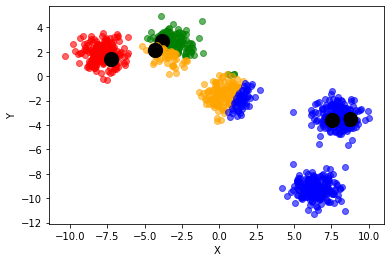

Iteration 0 --> Inertia: 2949.62


NameError: ignored

In [28]:
np.random.seed(1)
k_means_clustering(X, k=5)

[ 37 726 846 295 924]
Results of 5 iterations


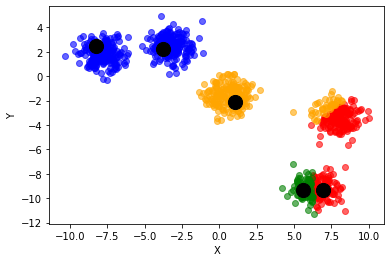

Iteration 0 --> Inertia: 2022.27


NameError: ignored

In [29]:
np.random.seed(2)
k_means_clustering(X, k=5)

[642 762 909 199 586]
Results of 5 iterations


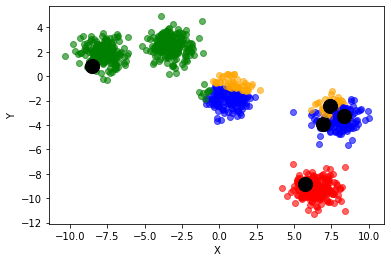

Iteration 0 --> Inertia: 3103.92


NameError: ignored

In [30]:
np.random.seed(3)
k_means_clustering(X, k=5)

[698 577 763 790 520]
Results of 5 iterations


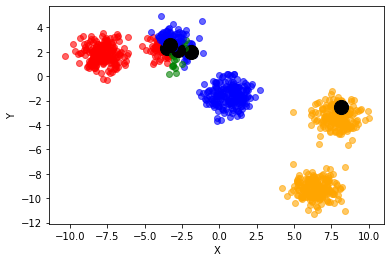

Iteration 0 --> Inertia: 3557.00


NameError: ignored

In [31]:
np.random.seed(4)
k_means_clustering(X, k=5)

[544 515 193  11 279]
Results of 5 iterations


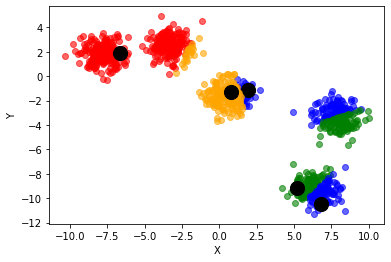

Iteration 0 --> Inertia: 2598.86


NameError: ignored

In [32]:
np.random.seed(5)
k_means_clustering(X, k=5)

[978  22 909 399 438]
Results of 5 iterations


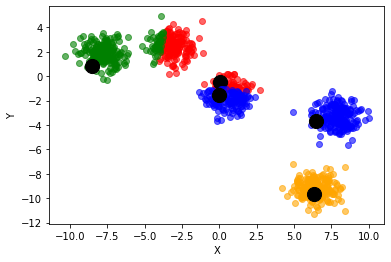

Iteration 0 --> Inertia: 1921.58


NameError: ignored

In [33]:
np.random.seed(6)
k_means_clustering(X, k=5)

[778 334 271 802 216]
Results of 5 iterations


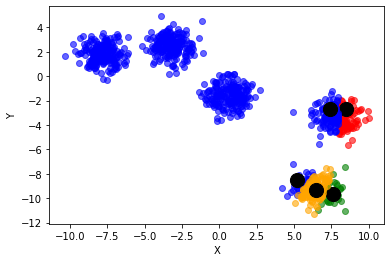

Iteration 0 --> Inertia: 7298.10


NameError: ignored

In [34]:
np.random.seed(7)
k_means_clustering(X, k=5)

[908 265 627 327 244]
Results of 5 iterations


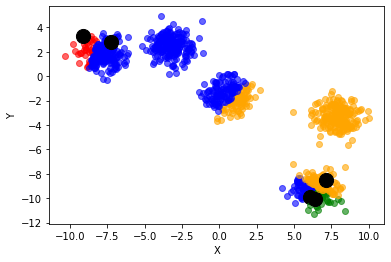

Iteration 0 --> Inertia: 4008.78


NameError: ignored

In [35]:
np.random.seed(8)
k_means_clustering(X, k=5)

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

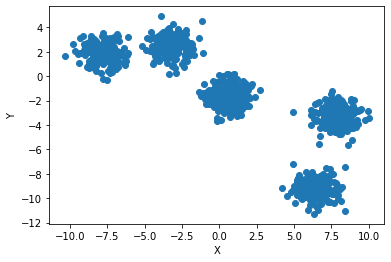

In [38]:
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.80, random_state=6) # n_samples: 생성할 데이터 총 개수, centers: 생성할 군집의 수
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

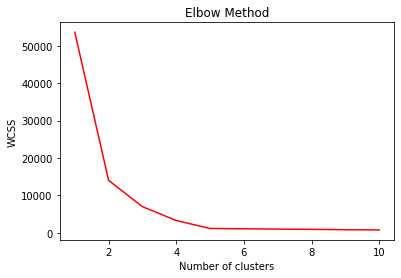

WCSS: [53585.070959676006, 14022.014844064228, 7006.516867507868, 3300.4919178872383, 1182.682170829657, 1092.3286427957535, 1013.0703151768425, 939.3608552674409, 846.2398567053247, 792.7741447808739]


In [39]:
wcss = []
for i in range(1, 11): # k 값을 1부터 10까지 변화하며 elbow plot 그리기
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print("WCSS:", wcss)

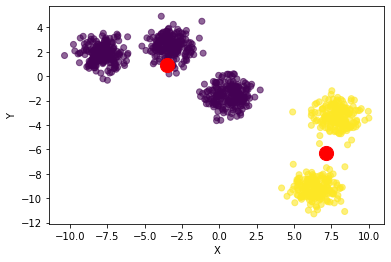

14022.014844064228


In [40]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0) # n_clusters: 위의 elbow plot에서 찾은 적절한 k값 입력
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(kmeans.inertia_)